In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Lire les données

In [2]:

dataset = pd.read_csv("Reviews.csv",encoding= "ISO-8859-1")
dataset                     

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
review = dataset["Text"]

In [4]:
review.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: Text, Length: 568454, dtype: bool

In [5]:
dataset.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
selected =  dataset.loc[:, ["Summary", "Text"]]
selected

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...
...,...,...
568449,Will not do without,Great for sesame chicken..this is a good if no...
568450,disappointed,I'm disappointed with the flavor. The chocolat...
568451,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [7]:
for item in np.array(selected.head(5)):
    print(item)

['Good Quality Dog Food'
 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.']
['Not as Advertised'
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".']
['"Delight" says it all'
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into sel

In [8]:
# donne la liste de toutes les vues
raw_review = selected.loc[:, ["Text"]] 
raw_review = raw_review["Text"]
raw_review[4]

'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.'

Extraction de caractères non alphanumériques et autres caractères bizarres!

In [9]:
weird_chars = []
for char in raw_review:
    weird_chars += re.findall(r"[^a-zA-Z0-9\s\w\.]", char.lower())
weird_char_list = list(set(weird_chars))
print(weird_char_list)

['£', '¦', ')', '%', '\x06', '\x87', '>', '\x13', ',', '\x0f', '¢', '@', '\x10', '©', '\x8c', '·', '§', '\x83', '\x97', '"', ':', '<', '~', '\xad', '&', '\x9e', '(', '«', '?', '{', '}', '$', '-', '°', '»', '\\', '¬', '!', '±', "'", ']', '¯', '+', '¨', '\x99', '*', '\x82', '\x07', '®', '¥', ';', '#', '`', '\x8e', '^', '=', '|', '/', '[', '´', '¸']


In [10]:
"".join(weird_char_list)

'£¦)%\x06\x87>\x13,\x0f¢@\x10©\x8c·§\x83\x97":<~\xad&\x9e(«?{}$-°»\\¬!±\']¯+¨\x99*\x82\x07®¥;#`\x8e^=|/[´¸'

#Les minuscules, la suppression des ponctuations et les caractères bizarres

In [11]:
review_traitee = [re.sub(r"[Î¾î\'\\\%!\$\&\'()\*\+,\-\.\/:;<=>?@\[\]^_`{|}~]", "", item).lower() for item in raw_review]
review_traitee[4]

'great taffy at a great price  there was a wide assortment of yummy taffy  delivery was very quick  if your a taffy lover this is a deal'

In [12]:
review_traitee

['i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most',
 'product arrived labeled as jumbo salted peanutsthe peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as "jumbo"',
 'this is a confection that has been around a few centuries  it is a light pillowy citrus gelatin with nuts  in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar  and it is a tiny mouthful of heaven  not too chewy and very flavorful  i highly recommend this yummy treat  if you are familiar with the story of cs lewis "the lion the witch and the wardrobe"  this is the treat that seduces edmund into selling out his brother and sisters to the witch',
 'if you are looking for the secret ingredient 

In [13]:
selected[["review"]] = pd.DataFrame(review_traitee)
selected[:10]

,Summary,Text,review
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...
5,Nice Taffy,I got a wild hair for taffy and ordered this f...,i got a wild hair for taffy and ordered this f...
6,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,this saltwater taffy had great flavors and was...
7,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,this taffy is so good it is very soft and che...
8,Yay Barley,Right now I'm mostly just sprouting this so my...,right now im mostly just sprouting this so my ...
9,Healthy Dog Food,This is a very healthy dog food. Good for thei...,this is a very healthy dog food good for their...


In [14]:
selected.head()

,Summary,Text,review
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...


In [15]:
dataset['Text'].value_counts()

This review will make me sound really stupid, but whatever. I don't really care as long as people find out what's real and can avoid my mistakes.<br /><br />I got my wonderful little sweet Bella Bean when she was a few days shy of three years old. She had been bounced around from house to house and eating whatever was cheap. I have had cats around me my entire life, for about twenty-five years now. My mother always just fed them whatever, the kinds of food you buy in the supermarket - Friskies, Nine Lives, Kit & Kaboodle, stuff like that. And our cats were always fine, at least in terms of their eating habits. They would eat in the morning, stop when they were done, come back, and eat some more when they got hungry.<br /><br />My housemate at the time was working for Hill's and assured me that this was the best food ever made, so great, so on and so forth. I now know that she is an utter buffoon, but I initially trusted her judgment, which is so unfortunate because she doesn't think. S

In [16]:
na_ind = [] ## list of reviews with na
multi_labels = [] ## lost of reviews  with multi labels
nan_ind = [] # List of reviews with nan
for i in range(len(selected)):
    if selected.loc[i, "Summary"] == "na":
        na_ind.append(i)
    else:
        try:
            if len(selected.loc[i, "Summary"].split("\r"))>1:
                multi_labels.append(i)
        except:
            nan_ind.append(i)
bad_ind = list(set(na_ind + nan_ind))
print("There are ", len(bad_ind), "bad indices \n")
print(bad_ind)

There are  27 bad indices 

[381313, 117515, 380558, 484367, 293906, 530716, 300961, 33958, 352043, 357814, 155712, 102979, 198474, 360782, 379473, 392529, 212691, 503260, 357215, 40548, 299495, 386283, 486640, 101106, 178290, 333556, 237565]


In [17]:
print("There are ", len(bad_ind), " Reviews with no labels: \n")
print("#############################################################\n")
for ind in bad_ind[:10]:
    print(selected.loc[ind, "Text"], "\n")

There are  27  Reviews with no labels: 

#############################################################

I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either. 

I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either. 

I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either. 

I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either. 

I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either. 

I only used two maybe three tea bags and got pregnant - can not drink during pregnancy.  Not a bad taste, but I'm not a big tea fan either. 

I only used two maybe three tea bags and got

In [18]:
rest_ind= [i for i in range(len(selected)) if i not in bad_ind] # The rest of indices
my_final_data = selected.loc[rest_ind,:]
my_final_data # Final clean data; qui n'a aucune valeurs manquantes sans caractères spéciaux

,Summary,Text,review
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...
...,...,...,...
568449,Will not do without,Great for sesame chicken..this is a good if no...,great for sesame chickenthis is a good if not ...
568450,disappointed,I'm disappointed with the flavor. The chocolat...,im disappointed with the flavor the chocolate ...
568451,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",these stars are small so you can give 1015 of ...
568452,Favorite Training and reward treat,These are the BEST treats for training and rew...,these are the best treats for training and rew...


In [19]:
col_label = my_final_data["Summary"] ## The column containg labels
labels = list(set(col_label)) # Original labels
print("The number of original labels is ", len(labels))

The number of original labels is  295742


In [20]:
labels

['Delicious low carb alternative',
 'Much better than you local supermarket',
 'Love Instant Breakfast, Hate the Strawberry',
 'Acidic',
 'Best ramen ever!',
 'Brisk, with a Honey Taste!',
 'Popcorn is stale',
 'It Seems That This is All My Dog Thinks About',
 'Take good care of your doggies',
 'Sublime chocolate',
 '2% calcium?',
 'excellent and convient',
 "I can't say enough",
 'Best thing like this ever',
 'Bland Marley.',
 'It Tastes Like Water!',
 'Great, low-fat substitute for french fries',
 'slightly less money in Spanish (c:',
 'This pickle is a must-have for our Holiday meals',
 'hard to find pasta',
 'One of the best puffs to start with - even with strong gagging reflex',
 'Best Chai Ever',
 "OK - wouldn't purchase again",
 'for the chocolate cake lover',
 'Happy Doggie',
 'Better than expected; amazing product',
 'Read the description!',
 'I love Cap`n crunch',
 "best treats we've found",
 'Interesting, intense, different, but I like it',
 'One big, wet clump',
 'Love it! 

In [21]:
dict_of_distrb = nltk.FreqDist(col_label)
sorted_raw_label_req = dict_of_distrb.most_common()
#sorted_raw_label_req = sorted(dict_of_distrb.items(), key = lambda x: x[1], reverse = True)
sorted_raw_label_req

[('Delicious!', 2462),
 ('Delicious', 2316),
 ('Yummy!', 1594),
 ('Yummy', 1268),
 ('Great product', 1091),
 ('Yum!', 1081),
 ('Excellent', 985),
 ('Love it!', 910),
 ('Great Product', 910),
 ('Great', 749),
 ('Great!', 748),
 ('Tasty', 645),
 ('Yum', 618),
 ('Disappointed', 587),
 ('Excellent!', 573),
 ('Great Coffee', 558),
 ('Awesome!', 550),
 ('Awesome', 546),
 ('Good stuff', 515),
 ('yummy', 512),
 ('great product', 476),
 ('Great product!', 474),
 ('Good Stuff', 472),
 ('Great coffee', 459),
 ('Love it', 444),
 ('delicious', 431),
 ('YUM!', 429),
 ('Good', 406),
 ('The Best', 404),
 ('Very good', 400),
 ('Amazing', 378),
 ('great', 368),
 ('Wonderful', 365),
 ('Amazing!', 345),
 ('Tasty!', 344),
 ('Excellent product', 340),
 ('Great Tea', 339),
 ('Wonderful!', 335),
 ('Great taste', 331),
 ('good stuff', 325),
 ('Fantastic', 315),
 ('Fantastic!', 307),
 ('Excellent Product', 305),
 ('Good product', 302),
 ('Great Product!', 302),
 ('Disappointing', 300),
 ('great coffee', 300),
 

In [22]:
for item in np.array(my_final_data):
    try:
        if item[1]!= "na" and len(item[1].split("\r")) > 3:
            print(item, "\n")
    except:
        continue

In [23]:
# Fixing random state for reproducibility

def freq_plotter(item_pair_freq, title):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_vals = [item[0] for item in item_pair_freq ]
    freq = [item[1] for item in item_pair_freq]
    y_pos = np.arange(len(y_vals))
    ax.barh(y_pos, freq,  align='center',
        color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_vals)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Frequency of the Label')
    ax.set_title(title)

    plt.show()
    plt.close()

In [24]:
## Writing plot as a fucntion and calling this fucntion when plot needed!
#Ici nous avons affiché les labels uniques et combinés 

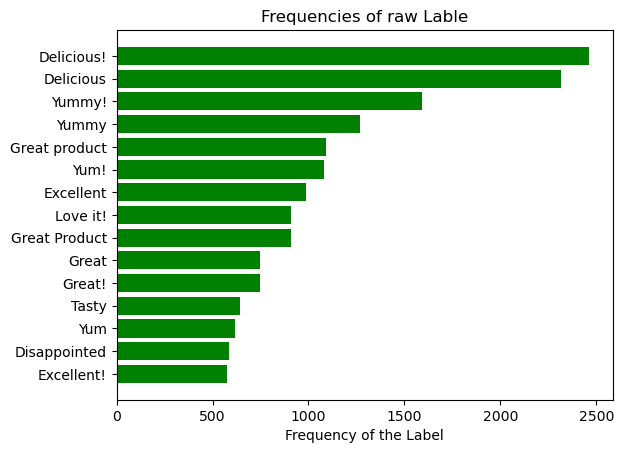

In [25]:
what_in_pic = sorted_raw_label_req[:15]
people = [(item[0].replace("\r", " & "), item[1]) for item in what_in_pic ]
freq_plotter(people, "Frequencies of raw Lable")

In [ ]:
#classes = set(sum( list(map(lambda x: x.split("\r"), labels)) , [] ))

In [ ]:
#classes

In [26]:
classes = ['Delicious!',  'Delicious',  'Yummy!', 'Yummy', 'Great Product', 'Yum!', 'Excellent', 'Love it!']
term_freq = dict.fromkeys(classes, 0)
for item in np.array(col_label):
    try: 
        for lab in item.split("\r"):
            term_freq[lab]+=1
    except:
        continue
term_freq

{'Delicious!': 2462,
 'Delicious': 2316,
 'Yummy!': 1594,
 'Yummy': 1268,
 'Great Product': 910,
 'Yum!': 1081,
 'Excellent': 985,
 'Love it!': 910}

In [27]:
col_label

0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 568427, dtype: object

In [ ]:
##Nous avons des données très déséquilibrées

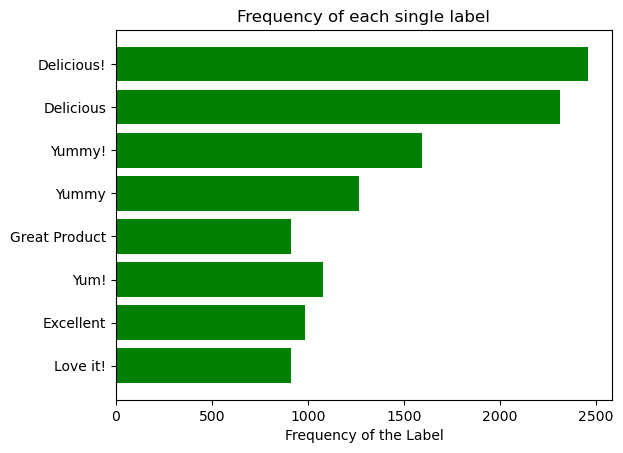

In [28]:
freq_plotter(term_freq.items(), "Frequency of each single label")

In [29]:
#nous allons creer un modele de prediction de la classe rudeServiser car c'est elle qui contient le plus des messages. 

SyntaxError: invalid syntax (<ipython-input-29-cd7b1d5096bc>, line 1)

In [30]:
my_final_data = my_final_data.rename(columns={"Delicious!":"classe", "Yummy":"text"})
datasetf= my_final_data
dataset

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
# renommons les valeurs de la colonne classe car il s'agissait des données categorique 
#df ["label"] = df ["classe"].apply(lambda classe:1 if classe=="RudeService"
                                    else 0 )

In [32]:
count_Class = pd.value_counts(dataset.label, sort = True)

# Data to Plot
labels = '1', '0'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'label'

In [34]:
#separation du dataset 
#30% pour la partie test et 70% de la partie train(apprentissage)
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.3)
print("%d items in training data, %d in test data" % (len(train), len(test)))
dataset.shape

397917 items in training data, 170537 in test data


(568454, 10)

In [35]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# To cleanup stop words, add stop_words = STOPWORDS
# But it seems to function better without it
count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = count_vect.fit_transform(train["Summary"])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["Text"]
y_test = test["Text"]

prediction = dict()

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

NameError: name 'X_train_tfidf' is not defined

In [ ]:
print(metrics.classification_report(y_test, prediction ['Logistic'], target_names = ["1", "0"]))

In [ ]:
import seaborn as sb

class_label = ['negative', 'positive']
conf_matrix = confusion_matrix(y_test, prediction['Logistic'])
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)
sb.heatmap(conf_matrix_df, annot=True, fmt='d')
plt.title("Confusion Matrix Bayes-Naive Multinomial")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("_" * 101)